In [6]:
#importar librerias
import pandas as pd
import numpy as np


In [7]:
#importar los archivos cvs de potencia y temperatura
tem=pd.read_csv(r'datos\temperatura_intervalo.csv')
pow=pd.read_csv(r'C:\Users\arzua\OneDrive\Escritorio\EDA\datos\power.cvs')
tem
#tem tiene intervalos

FileNotFoundError: [Errno 2] No such file or directory: 'datos\\temperatura_intervalo.csv'

In [16]:
# Convertir las columnas de fecha y hora en formato datetime
tem['intervalo'] = pd.to_datetime(tem['intervalo'].str.strip('()').str.split(',').str[0].str.strip(), format='%Y-%m-%d %H:%M:%S')
pow['date'] = pd.to_datetime(pow['date'], format='%d/%m/%Y %H:%M')

# Fusionar los dataframes basados en el rango de tiempo
df_combined = pd.merge_asof(tem, pow, left_on='intervalo', right_on='date')

In [17]:
df_combined

,intervalo,TA1,date,power
0,2018-01-01 00:00:00,15.80,2018-01-01 00:00:00,12.8
1,2018-01-01 00:10:00,15.70,2018-01-01 00:10:00,12.8
2,2018-01-01 00:20:00,15.60,2018-01-01 00:20:00,12.7
3,2018-01-01 00:30:00,15.50,2018-01-01 00:30:00,12.4
4,2018-01-01 00:40:00,15.40,2018-01-01 00:40:00,12.4
...,...,...,...,...
15758,2018-04-20 10:20:00,16.28,2018-04-20 10:20:00,48.0
15759,2018-04-20 10:30:00,16.06,2018-04-20 10:30:00,46.7
15760,2018-04-20 10:40:00,15.88,2018-04-20 10:40:00,50.0
15761,2018-04-20 10:50:00,15.94,2018-04-20 10:50:00,50.6


In [18]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15763 entries, 0 to 15762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   intervalo  15763 non-null  datetime64[ns]
 1   TA1        12391 non-null  float64       
 2   date       15763 non-null  datetime64[ns]
 3   power      15763 non-null  float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 615.7 KB


In [19]:
# Eliminar la columna 'intervalo' del dataframe de intervalos de temperatura
df_combined.drop(columns=['intervalo'], inplace=True)


In [20]:
df_combined.info()
df_combined

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15763 entries, 0 to 15762
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TA1     12391 non-null  float64       
 1   date    15763 non-null  datetime64[ns]
 2   power   15763 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 492.6 KB


,TA1,date,power
0,15.80,2018-01-01 00:00:00,12.8
1,15.70,2018-01-01 00:10:00,12.8
2,15.60,2018-01-01 00:20:00,12.7
3,15.50,2018-01-01 00:30:00,12.4
4,15.40,2018-01-01 00:40:00,12.4
...,...,...,...
15758,16.28,2018-04-20 10:20:00,48.0
15759,16.06,2018-04-20 10:30:00,46.7
15760,15.88,2018-04-20 10:40:00,50.0
15761,15.94,2018-04-20 10:50:00,50.6


In [1]:
df_combined.to_csv('df.CVS')

NameError: name 'df_combined' is not defined

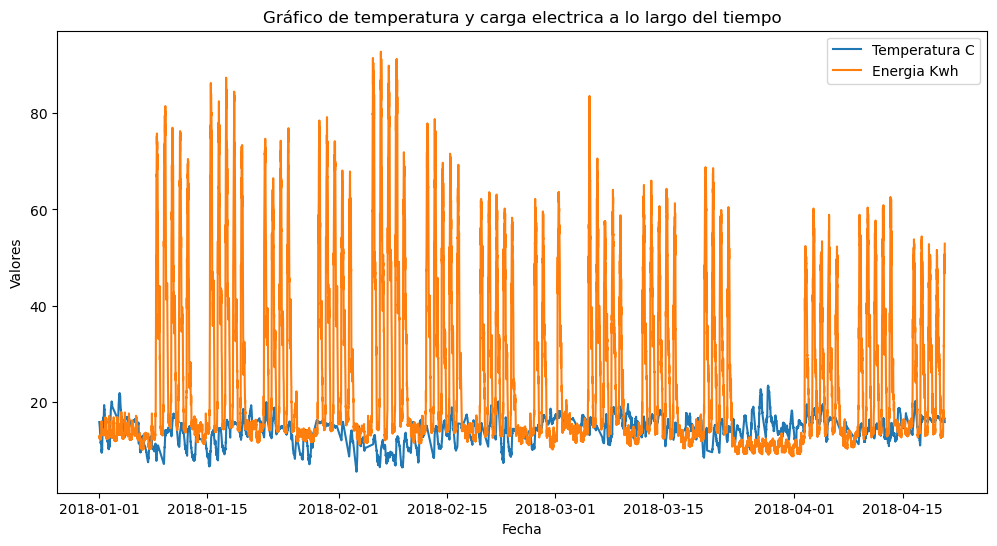

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado df_combined con las columnas 'TA1' y 'power'

# Plotear los datos utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined, x='date', y='TA1', label='Temperatura C')
sns.lineplot(data=df_combined, x='date', y='power', label='Energia Kwh')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Gráfico de temperatura y carga electrica a lo largo del tiempo')
plt.legend()
plt.show()
